In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math

In [40]:
filename = '0f20c52c24764413a7072e1fd034b2b4.xls'
df = pd.read_excel(filename)
df.shape
df = df[df['weekday'].isin(list(range(1,6)))]
df.shape

(911, 22)

In [41]:
len(set(df['datetime']))

213

In [42]:
#df['start_address_name'].value_counts()
def get_gps_poi(gps_poi,poi):
    return float(gps_poi.split(',')[poi])

In [43]:
# address_gps = []
# address_gps.append(df.iloc[0]['start_gps_poi'])
# for i in range(1,df.shape[0]):
#     if df.iloc[i]['datetime'] == df.iloc[i-1]['datetime']:
#         address_gps.append(df.iloc[i]['start_gps_poi'])
#         address_gps.append(df.iloc[i-1]['end_gps_poi'])
# address_gps.append(df.iloc[0]['end_gps_poi'])

In [44]:
end_address_gps = []
for i in range(1, df.shape[0]):
    if df['datetime'].iloc[i] != df['datetime'].iloc[i - 1]:
        continue
    else:
        # 获取上次的终止地址的GPS信息
        last_x = get_gps_poi(df['end_gps_poi'].iloc[i - 1], 0)
        last_y = get_gps_poi(df['end_gps_poi'].iloc[i - 1], 1)
        # 获取当前开始地址的GPS信息
        now_x = get_gps_poi(df['start_gps_poi'].iloc[i], 0)
        now_y = get_gps_poi(df['start_gps_poi'].iloc[i], 1)

        diff_time = df['start_time'].iloc[i] - pd.to_datetime(df['end_time'].iloc[i - 1])
        hours = int(str(diff_time).split(' ')[2].split(':')[0])
        minues = int(str(diff_time).split(' ')[2].split(':')[1])
        all_minues = hours * 60 + minues
        # 间隔小于100米 且时间超过200分钟，进行记录
        if pow((now_x - last_x) ** 2 + (now_y - last_y) ** 2, 0.5) < 0.001 and all_minues >= 200:
            end_address_gps.append(df.iloc[i]['start_gps_poi'])

In [45]:
len(end_address_gps)

127

In [69]:
pointsList = []
for item in end_address_gps:
    point = []
    x =get_gps_poi(item,0)
    y =get_gps_poi(item,1)
    point.append(x)
    point.append(y)
    pointsList.append(point)    
#pointsList
len(pointsList)

127

In [47]:
pointsList1 = []
dict_a = {}
for item in end_address_gps:
    point = []
    point.append(float(item.split(',')[0]))
    point.append(float(item.split(',')[1]))
    point.append(1)
    pointsList1.append(point)     
with open('a.txt','w') as f:
    f.write(str(pointsList1))

In [48]:
xy = np.array(pointsList)
#xy[:,0]
xy[0,:]

array([115.8533333,  28.7493333])

In [49]:
xy[:,0]

array([115.8533333, 115.9061666, 115.8536666, 115.8535   , 115.8535   ,
       115.8533333, 115.9538333, 115.8533333, 115.817    , 115.8165   ,
       115.8541666, 115.9144999, 115.8538333, 115.8443333, 115.9306666,
       115.8531666, 115.9301666, 115.8535   , 115.8536666, 115.818    ,
       115.7773333, 115.6968333, 115.8178333, 115.9144999, 115.8178333,
       115.8833333, 115.9141666, 115.9141666, 115.8376666, 115.8358333,
       115.9218333, 115.9221666, 115.8181666, 115.8329999, 115.9223333,
       115.9218333, 115.922    , 115.9218333, 115.9221666, 115.922    ,
       115.922    , 115.9216666, 115.9218333, 115.9223333, 115.9225   ,
       115.9225   , 115.9225   , 115.9221666, 115.9225   , 115.9225   ,
       115.9226666, 115.9216666, 115.922    , 115.9223333, 115.9141666,
       115.8256666, 115.818    , 115.818    , 115.8178333, 116.0109999,
       116.0113333, 116.0111666, 116.0105   , 115.9385   , 116.0109999,
       116.0108333, 116.0108333, 116.0111666, 116.0108333, 116.0

In [50]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
#X
# X.describe()

In [51]:
X[:10]

,lng,lat
0,115.853333,28.749333
1,115.906167,28.593000
2,115.853667,28.749000
3,115.853500,28.749333
4,115.853500,28.749333
5,115.853333,28.749167
6,115.953833,28.663500
7,115.853333,28.749333
8,115.817000,28.683000
9,115.816500,28.682667


In [52]:
#re.labels_

In [53]:
#dir(re)

In [54]:
fig =plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

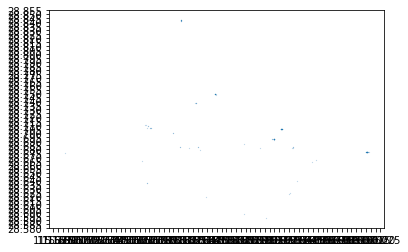

In [55]:
plt.scatter(xy[:,0],xy[:,1],s=0.01)
plt.locator_params(nbins = 100)

In [56]:
def haversine(lonlat1, lonlat2):
    lon1, lat1  = lonlat1
    lon2, lat2= lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1000


In [57]:
haversine([116.456, 39.921],[116.456, 39.920])

111.19492664426889

In [58]:
Y=[[1.001,2.000],[1.002,2.000],[1.003,2.000],[1.003,2.000]]
squareform(pdist(Y, (lambda u, v: haversine(u, v))))

array([[  0.       , 111.1271897, 222.2543794, 222.2543794],
       [111.1271897,   0.       , 111.1271897, 111.1271897],
       [222.2543794, 111.1271897,   0.       ,   0.       ],
       [222.2543794, 111.1271897,   0.       ,   0.       ]])

In [59]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
def clustering_by_dbscan():
    
    distance_matrix = squareform(pdist(X, (lambda u, v: haversine(u, v))))
    # 2代表两公里  
    db = DBSCAN(eps=100, min_samples=5, metric='precomputed')  
    y_db = db.fit_predict(distance_matrix)
    X['cluster'] = y_db
    plt.scatter(X['lng'], X['lat'], c=X['cluster'])
    plt.show()
#X['cluster'].value_counts()


In [60]:
X.head()

,lng,lat
0,115.853333,28.749333
1,115.906167,28.593000
2,115.853667,28.749000
3,115.853500,28.749333
4,115.853500,28.749333


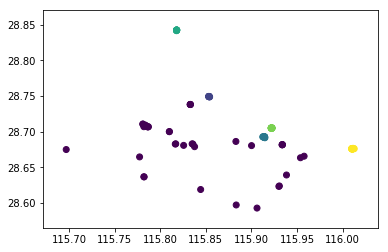

In [61]:
clustering_by_dbscan()

In [62]:
cluster = X['cluster'].value_counts().keys()[0]
cluster

-1

In [63]:
 i = 0
# 获取结果最多的簇类型
cluster = X['cluster'].value_counts().keys()[i]
# -1为离群点 无用,选择下一个
if cluster == -1:
    i += 1
    cluster = X['cluster'].value_counts().keys()[i]
cluster

4

In [64]:
X['cluster'].value_counts()


-1    39
 4    28
 3    22
 1    18
 0    11
 2     9
Name: cluster, dtype: int64

In [65]:
len(X[X['cluster'] == -1])

39

In [66]:
X['cluster'].value_counts().values[0]/X.shape[0]

0.30708661417322836

In [67]:
X[X['cluster'] == cluster]['lat'].value_counts()

28.676333    12
28.676000     7
28.676167     6
28.676667     1
28.676500     1
28.675500     1
Name: lat, dtype: int64

In [71]:
X['count'] = 1
xx = X[X['cluster'] == cluster].groupby(['lat','lng']).sum()

xx

cluster  count
lat       lng                       
28.675500 116.010500        4      1
28.676000 116.010167       12      3
          116.010833        8      2
          116.011000        4      1
          116.011167        4      1
28.676167 116.010167        4      1
          116.010833        4      1
          116.011000        8      2
          116.011833        4      1
          116.012833        4      1
28.676333 116.010167        8      2
          116.011000        8      2
          116.011167       12      3
          116.011333       12      3
          116.011500        4      1
          116.011667        4      1
28.676500 116.011500        4      1
28.676667 116.011500        4      1

In [31]:
yy = xx.reset_index()

df_ = yy[yy['count'] == max(yy['count'])]
res_lng =df_['lng'].iloc[0]
res_lat = df_['lat'].iloc[0]
res_lng,res_lat

(119.67116659999999, 30.616833299999996)

In [32]:
X[X['cluster'] == cluster]['lng'].mean()

119.6713240277778

In [33]:
X[X['cluster'] == cluster]['lat'].mean()

30.61683329999999

In [34]:
120.12049999999999,29.338833300000005

(120.12049999999999, 29.338833300000005)

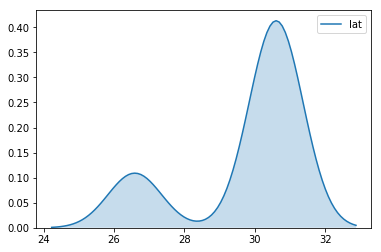

In [35]:
#sns.jointplot(x='lng', y='lat', data=X,)
#sns.kdeplot(X['lng'], shade=True)   
sns.kdeplot(X['lat'], shade=True)   

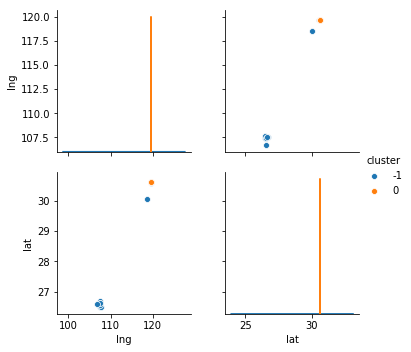

In [36]:
sns.pairplot(X,vars = ['lng','lat'],hue="cluster")

In [37]:
'''calculate the density, and return the max-density position'''
def kernel_density(x, y, typename):
    x_min = min(x)
    x_max = max(x)
    y_min = min(y)
    y_max = max(y)
    xx = list(zip(x, y))
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1, algorithm='kd_tree').fit(xx)
    log_dens = kde.score_samples(xx)
    z = np.exp(log_dens).tolist()
    max_poi = z.index(max(z))
#     print(xx[z.index(max(z))])
    max_lon = x[max_poi]
    max_lat = y[max_poi]
#     fig1 = pl.figure()
#     ax1 = fig1.gca()
#     ax1.set_xlim(x_min, x_max)
#     ax1.set_ylim(y_min, y_max)
#     ax1.scatter(x, y, c=z, cmap='Blues')
#     ax1.scatter(x[max_poi], y[max_poi],marker='p', c='r')
# #     ax1.imshow(np.rot90(z), cmap = 'Blues', extent=[x_min, x_max, y_min, y_max])
# #     cset = ax1.contour(x, y, z, colors='k')
# #     ax1.clabel(cset, inline = 1, fontsize=10)
#     ax1.set_xlabel('lontitude')
#     ax1.set_ylabel('latitude')
#     filename = typename+' gkde1.jpg'
#     pl.savefig(filename)
    return max_lon, max_lat

In [38]:
kernel_density(xy[:,0],xy[:,1],'a')

(119.67116659999999, 30.616666600000002)

In [131]:
import requests
ak = 'a09Yb0opKaB0wcD076UUnevNUBmPQ9MK'
# location = '37.994333299999994,115.52883329999997'
location = ','.join([str(res_lat),str(res_lng)])
item = {'location': location,'ak':ak,'output':'json'}

res = requests.get('http://api.map.baidu.com/geocoder/v2/',params=item)
res_json = res.json()
res_json



{'status': 0,
 'result': {'location': {'lng': 115.52883329999992, 'lat': 37.99433334099502},
  'formatted_address': '河北省衡水市深州市',
  'business': '',
  'addressComponent': {'country': '中国',
   'country_code': 0,
   'country_code_iso': 'CHN',
   'country_code_iso2': 'CN',
   'province': '河北省',
   'city': '衡水市',
   'city_level': 2,
   'district': '深州市',
   'town': '',
   'adcode': '131182',
   'street': '',
   'street_number': '',
   'direction': '',
   'distance': ''},
  'pois': [],
  'roads': [],
  'poiRegions': [],
  'sematic_description': '深州市隆利达挂车有限公司南534米',
  'cityCode': 208}}

In [132]:
res_json['result']

provnce = res_json['result']['addressComponent']['province']
city = res_json['result']['addressComponent']['city']
district = res_json['result']['addressComponent']['district']
town = res_json['result']['addressComponent']['town']
street = res_json['result']['addressComponent']['street']
tag = ''
if  res_json['result']['poiRegions'] !=[]:
    tag = res_json['result']['poiRegions'][0]['tag']
address = res_json['result']['sematic_description']

provnce,city,district,town,street,tag,address

('河北省', '衡水市', '深州市', '', '', '', '深州市隆利达挂车有限公司南534米')